In [122]:
import numpy as np 
import pandas as pd 

In [123]:
import yaml

PATH = "../input/mymusicalprefrences/" 
train = pd.read_csv(f"{PATH}train.csv")
test = pd.read_csv(f"{PATH}test.csv")
description = yaml.load(open(f"{PATH}Description.yaml",'r'),Loader=yaml.FullLoader)
df = pd.concat([train,test]).reset_index(drop=True)
tr_mask = ~df.Category.isna()

In [124]:
train.isnull().sum()

Id                  0
Category            0
Artists             1
Track               0
Version           571
Duration            0
Artists_Genres      0
Album               2
Release_year        0
Album_type        526
Labels              5
Key                 0
BPM                 0
Vocal               0
Country             7
Energy              1
Dancebility         1
Happiness           1
dtype: int64

In [125]:
df.describe()

,Id,Category,Duration,Release_year,BPM,Energy,Dancebility,Happiness
count,965.000000,665.000000,965.000000,965.000000,965.000000,964.000000,964.000000,964.000000
mean,482.000000,0.527820,228246.466321,2011.816580,117.537824,68.751037,63.454357,50.268672
std,278.715805,0.499601,58343.816188,8.850096,25.801064,19.162589,16.420202,23.482333
min,0.000000,0.000000,102000.000000,1941.000000,49.000000,2.000000,15.000000,4.000000
25%,241.000000,0.000000,189760.000000,2008.000000,97.000000,56.000000,52.750000,32.000000
50%,482.000000,1.000000,222800.000000,2014.000000,117.000000,71.000000,65.000000,51.000000
75%,723.000000,1.000000,255200.000000,2018.000000,135.000000,83.000000,76.000000,68.000000
max,964.000000,1.000000,716490.000000,2021.000000,176.000000,100.000000,97.000000,99.000000


In [126]:
df

,Id,Category,Artists,Track,Version,Duration,Artists_Genres,Album,Release_year,Album_type,Labels,Key,BPM,Vocal,Country,Energy,Dancebility,Happiness
0,0,0.0,Avatar,Hail the Apocalypse,NaN,253660,metal,Hail the Apocalypse,2014,NaN,Gain,F# Major,93,M,SWE,99.0,42.0,30.0
1,1,1.0,Céline Dion,My Heart Will Go On,Soundtrack,284150,soundtrack|classical|pop,My Love Ultimate Essential Collection,2019,NaN,Sony Music Entertainment Canada,E Major,99,F,CA,28.0,43.0,4.0
2,2,1.0,Adele,Skyfall,Soundtrack,286480,pop,Skyfall,2012,single,Melted Stone|Skyfall|Columbia,C Minor,76,F,GB,55.0,35.0,8.0
3,3,1.0,Kiss,I Was Made for Lovin' You,Soundtrack,268440,hardrock|rock|foreignrap,KISS Box Set,2001,NaN,The Island Def Jam,E Major,128,M,USA,85.0,77.0,87.0
4,4,0.0,Kanye West,Stronger,NaN,311420,foreignrap,Graduation,2007,NaN,A Roc-A-Fella Records release,B♭ Minor,104,M,USA,72.0,62.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,960,NaN,Ленинград,Кабриолет,NaN,161530,rusrock,Кабриолет,2019,single,ShnurOK / Первое музыкальное,G Minor,132,M,RUS,82.0,75.0,80.0
961,961,NaN,Gorillaz,Rock The House,Radio Edit,183640,indie,G-Sides,2002,NaN,Parlophone,D Major,172,M,GB,82.0,75.0,61.0
962,962,NaN,Guano Apes,Open Your Eyes,NaN,186520,rock|alternative,Planet Of The Apes - Best Of Guano Apes,2015,NaN,Gun,E Minor,112,F,USA,96.0,63.0,43.0
963,963,NaN,The Chainsmokers|Coldplay,Something Just Like This,NaN,247620,electronics|rock|dance,Memories...Do Not Open,2017,NaN,Disruptor|Columbia,B Minor,130,M,GB,63.0,62.0,45.0


In [127]:
df.isnull().sum()

Id                  0
Category          300
Artists             1
Track               0
Version           836
Duration            0
Artists_Genres      0
Album               2
Release_year        0
Album_type        753
Labels              6
Key                 0
BPM                 0
Vocal               1
Country            12
Energy              1
Dancebility         1
Happiness           1
dtype: int64

In [128]:
#cleaning up and sorting data
df.columns = [i.strip() for i in df.columns]

cat_features = {"Artists","Track","Version","Artists_Genres","Album","Album_type","Labels","Vocal","Country","Key"}

con_features = {"Duration","Release_year","BPM","Energy","Dancebility","Happiness"}

display(df[cat_features].head())
display(df[con_features].head())

,Vocal,Labels,Album_type,Country,Key,Album,Artists_Genres,Track,Artists,Version
0,M,Gain,NaN,SWE,F# Major,Hail the Apocalypse,metal,Hail the Apocalypse,Avatar,NaN
1,F,Sony Music Entertainment Canada,NaN,CA,E Major,My Love Ultimate Essential Collection,soundtrack|classical|pop,My Heart Will Go On,Céline Dion,Soundtrack
2,F,Melted Stone|Skyfall|Columbia,single,GB,C Minor,Skyfall,pop,Skyfall,Adele,Soundtrack
3,M,The Island Def Jam,NaN,USA,E Major,KISS Box Set,hardrock|rock|foreignrap,I Was Made for Lovin' You,Kiss,Soundtrack
4,M,A Roc-A-Fella Records release,NaN,USA,B♭ Minor,Graduation,foreignrap,Stronger,Kanye West,NaN


,Energy,Dancebility,BPM,Happiness,Release_year,Duration
0,99.0,42.0,93,30.0,2014,253660
1,28.0,43.0,99,4.0,2019,284150
2,55.0,35.0,76,8.0,2012,286480
3,85.0,77.0,128,87.0,2001,268440
4,72.0,62.0,104,49.0,2007,311420


In [129]:
df['Vocal'].unique()

array(['M', 'F', 'F|M', 'N', nan], dtype=object)

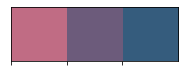

In [130]:
import seaborn as sns
palette = ['#c06c84',"#6c5b7b","#355c7d"]
sns.palplot(palette)

In [131]:
df["Category"] = df["Category"].fillna("none").replace({0:"dislike",1:"like"})
df["Category"].head()

import plotly.graph_objects as go

def plot_commulative_onehot(onehot):
    """
    Method of plotting commulative values of the one hot feature representation
    """
    _df = onehot.groupby("Category").sum()
    fig = go.Figure()
    for i in range(len(_df.index)):
        k = _df.index[i]
        x,y=[],[]
        for g in _df.columns:
            if _df.loc[k,g]!=0:
                x.append(g)
                y.append(_df.loc[k,g])
        fig.add_trace(go.Bar(x=x, y=y,name=k,marker=dict(color=palette[i])))
    fig.show()

**Vocals**

In [132]:

df['Vocal'] = df['Vocal'].fillna('N')

onehot = np.zeros((len(df),2))
for i in range(len(df)):
    x = df.iloc[i]['Vocal']
    if x == 'F':
        onehot[i] = [1,0]
    elif x == 'M':
        onehot[i] = [0,1]
    elif x == 'N':
        onehot[i] = [1,1]

df[["Fem_voc","Mal_voc"]] = onehot

df = df.drop('Vocal',axis=1)
df.head()

,Id,Category,Artists,Track,Version,Duration,Artists_Genres,Album,Release_year,Album_type,Labels,Key,BPM,Country,Energy,Dancebility,Happiness,Fem_voc,Mal_voc
0,0,dislike,Avatar,Hail the Apocalypse,NaN,253660,metal,Hail the Apocalypse,2014,NaN,Gain,F# Major,93,SWE,99.0,42.0,30.0,0.0,1.0
1,1,like,Céline Dion,My Heart Will Go On,Soundtrack,284150,soundtrack|classical|pop,My Love Ultimate Essential Collection,2019,NaN,Sony Music Entertainment Canada,E Major,99,CA,28.0,43.0,4.0,1.0,0.0
2,2,like,Adele,Skyfall,Soundtrack,286480,pop,Skyfall,2012,single,Melted Stone|Skyfall|Columbia,C Minor,76,GB,55.0,35.0,8.0,1.0,0.0
3,3,like,Kiss,I Was Made for Lovin' You,Soundtrack,268440,hardrock|rock|foreignrap,KISS Box Set,2001,NaN,The Island Def Jam,E Major,128,USA,85.0,77.0,87.0,0.0,1.0
4,4,dislike,Kanye West,Stronger,NaN,311420,foreignrap,Graduation,2007,NaN,A Roc-A-Fella Records release,B♭ Minor,104,USA,72.0,62.0,49.0,0.0,1.0


**Release Year**

In [133]:
description['Release year']

{'description': 'The year of the albom release', 'values': 'Year number'}

In [134]:
import plotly.express as xp
xp.scatter(df, x="Release_year", y="Track",color="Category", height=500, color_discrete_sequence=palette)

In [135]:

df.loc[:,'Release_decade'] = df.loc[:,'Release_year']//10 * 10

def summarize(a_number):
    if a_number < 1990:
        return int(1990)
    else:
        return int(a_number)
df['Release_decade'] = df['Release_decade'].map(summarize)

_df = df.groupby(["Release_decade","Category"], as_index=False).count()
xp.bar(_df,x="Release_decade", y="Track",color="Category",height=500, color_discrete_sequence=palette)

In [136]:
pd.crosstab(df["Category"] ,df["Release_decade"], normalize=True)

Release_decade,1990,2000,2010,2020
Category,,,,
dislike,0.014508,0.093264,0.158549,0.059067
like,0.025907,0.083938,0.220725,0.033161
none,0.023834,0.071503,0.164767,0.050777


In [137]:
df.drop(columns =["Release_year"], inplace = True)

**Happiness, Energy, Dancebility, BPM**

In [138]:
df[['Happiness','Dancebility','Energy']].head()

,Happiness,Dancebility,Energy
0,30.0,42.0,99.0
1,4.0,43.0,28.0
2,8.0,35.0,55.0
3,87.0,77.0,85.0
4,49.0,62.0,72.0


In [139]:
df['BPM'].head()

0     93
1     99
2     76
3    128
4    104
Name: BPM, dtype: int64

**Key**

In [140]:
df['Key'].isnull().sum()

0

In [141]:
df.head()

,Id,Category,Artists,Track,Version,Duration,Artists_Genres,Album,Album_type,Labels,Key,BPM,Country,Energy,Dancebility,Happiness,Fem_voc,Mal_voc,Release_decade
0,0,dislike,Avatar,Hail the Apocalypse,NaN,253660,metal,Hail the Apocalypse,NaN,Gain,F# Major,93,SWE,99.0,42.0,30.0,0.0,1.0,2010
1,1,like,Céline Dion,My Heart Will Go On,Soundtrack,284150,soundtrack|classical|pop,My Love Ultimate Essential Collection,NaN,Sony Music Entertainment Canada,E Major,99,CA,28.0,43.0,4.0,1.0,0.0,2010
2,2,like,Adele,Skyfall,Soundtrack,286480,pop,Skyfall,single,Melted Stone|Skyfall|Columbia,C Minor,76,GB,55.0,35.0,8.0,1.0,0.0,2010
3,3,like,Kiss,I Was Made for Lovin' You,Soundtrack,268440,hardrock|rock|foreignrap,KISS Box Set,NaN,The Island Def Jam,E Major,128,USA,85.0,77.0,87.0,0.0,1.0,2000
4,4,dislike,Kanye West,Stronger,NaN,311420,foreignrap,Graduation,NaN,A Roc-A-Fella Records release,B♭ Minor,104,USA,72.0,62.0,49.0,0.0,1.0,2000


In [142]:
# new df with columns
new = df["Key"].str.split(" ", n = 1, expand = True)
  
df["new_key"]= new[0]
df["is_Minor"]= new[1]

df.drop(columns =["Key"], inplace = True)

df

,Id,Category,Artists,Track,Version,Duration,Artists_Genres,Album,Album_type,Labels,BPM,Country,Energy,Dancebility,Happiness,Fem_voc,Mal_voc,Release_decade,new_key,is_Minor
0,0,dislike,Avatar,Hail the Apocalypse,NaN,253660,metal,Hail the Apocalypse,NaN,Gain,93,SWE,99.0,42.0,30.0,0.0,1.0,2010,F#,Major
1,1,like,Céline Dion,My Heart Will Go On,Soundtrack,284150,soundtrack|classical|pop,My Love Ultimate Essential Collection,NaN,Sony Music Entertainment Canada,99,CA,28.0,43.0,4.0,1.0,0.0,2010,E,Major
2,2,like,Adele,Skyfall,Soundtrack,286480,pop,Skyfall,single,Melted Stone|Skyfall|Columbia,76,GB,55.0,35.0,8.0,1.0,0.0,2010,C,Minor
3,3,like,Kiss,I Was Made for Lovin' You,Soundtrack,268440,hardrock|rock|foreignrap,KISS Box Set,NaN,The Island Def Jam,128,USA,85.0,77.0,87.0,0.0,1.0,2000,E,Major
4,4,dislike,Kanye West,Stronger,NaN,311420,foreignrap,Graduation,NaN,A Roc-A-Fella Records release,104,USA,72.0,62.0,49.0,0.0,1.0,2000,B♭,Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,960,none,Ленинград,Кабриолет,NaN,161530,rusrock,Кабриолет,single,ShnurOK / Первое музыкальное,132,RUS,82.0,75.0,80.0,0.0,1.0,2010,G,Minor
961,961,none,Gorillaz,Rock The House,Radio Edit,183640,indie,G-Sides,NaN,Parlophone,172,GB,82.0,75.0,61.0,0.0,1.0,2000,D,Major
962,962,none,Guano Apes,Open Your Eyes,NaN,186520,rock|alternative,Planet Of The Apes - Best Of Guano Apes,NaN,Gun,112,USA,96.0,63.0,43.0,1.0,0.0,2010,E,Minor
963,963,none,The Chainsmokers|Coldplay,Something Just Like This,NaN,247620,electronics|rock|dance,Memories...Do Not Open,NaN,Disruptor|Columbia,130,GB,63.0,62.0,45.0,0.0,1.0,2010,B,Minor


In [143]:
df.new_key.unique()

array(['F#', 'E', 'C', 'B♭', 'A♭', 'F', 'A', 'B', 'D', 'E♭', 'G', 'D♭',
       'C#'], dtype=object)

In [144]:
def key_change(key):
    if key == 'D♭':
        return 'C#'
    elif key == 'E♭':
        return 'D#'
    elif key == 'G♭':
        return 'F#'
    elif key == 'A♭':
        return 'G#'
    elif key == 'B♭':
        return 'A#'
    else:
        return key

_df.new_key = df.new_key.map(key_change)
_df.new_key.unique()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



array(['F#', 'E', 'C', 'A#', 'G#', 'F', 'A', 'B', 'D', 'D#', 'G', 'C#'],
      dtype=object)

In [145]:
df.new_key = df.new_key.map(key_change)
df.new_key

0      F#
1       E
2       C
3       E
4      A#
       ..
960     G
961     D
962     E
963     B
964    C#
Name: new_key, Length: 965, dtype: object

In [146]:
df = pd.get_dummies(df, columns = ['new_key'])
df

,Id,Category,Artists,Track,Version,Duration,Artists_Genres,Album,Album_type,Labels,...,new_key_B,new_key_C,new_key_C#,new_key_D,new_key_D#,new_key_E,new_key_F,new_key_F#,new_key_G,new_key_G#
0,0,dislike,Avatar,Hail the Apocalypse,NaN,253660,metal,Hail the Apocalypse,NaN,Gain,...,0,0,0,0,0,0,0,1,0,0
1,1,like,Céline Dion,My Heart Will Go On,Soundtrack,284150,soundtrack|classical|pop,My Love Ultimate Essential Collection,NaN,Sony Music Entertainment Canada,...,0,0,0,0,0,1,0,0,0,0
2,2,like,Adele,Skyfall,Soundtrack,286480,pop,Skyfall,single,Melted Stone|Skyfall|Columbia,...,0,1,0,0,0,0,0,0,0,0
3,3,like,Kiss,I Was Made for Lovin' You,Soundtrack,268440,hardrock|rock|foreignrap,KISS Box Set,NaN,The Island Def Jam,...,0,0,0,0,0,1,0,0,0,0
4,4,dislike,Kanye West,Stronger,NaN,311420,foreignrap,Graduation,NaN,A Roc-A-Fella Records release,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,960,none,Ленинград,Кабриолет,NaN,161530,rusrock,Кабриолет,single,ShnurOK / Первое музыкальное,...,0,0,0,0,0,0,0,0,1,0
961,961,none,Gorillaz,Rock The House,Radio Edit,183640,indie,G-Sides,NaN,Parlophone,...,0,0,0,1,0,0,0,0,0,0
962,962,none,Guano Apes,Open Your Eyes,NaN,186520,rock|alternative,Planet Of The Apes - Best Of Guano Apes,NaN,Gun,...,0,0,0,0,0,1,0,0,0,0
963,963,none,The Chainsmokers|Coldplay,Something Just Like This,NaN,247620,electronics|rock|dance,Memories...Do Not Open,NaN,Disruptor|Columbia,...,1,0,0,0,0,0,0,0,0,0


In [147]:
df.is_Minor

0      Major
1      Major
2      Minor
3      Major
4      Minor
       ...  
960    Minor
961    Major
962    Minor
963    Minor
964    Major
Name: is_Minor, Length: 965, dtype: object

In [148]:
def is_Minor(a_str):
    if a_str == 'Minor':
        return 1
    if a_str == 'Major':
        return 0
df.is_Minor = df.is_Minor.map(is_Minor)
df.is_Minor

0      0
1      0
2      1
3      0
4      1
      ..
960    1
961    0
962    1
963    1
964    0
Name: is_Minor, Length: 965, dtype: int64

**Genres**

In [149]:
df.head()

,Id,Category,Artists,Track,Version,Duration,Artists_Genres,Album,Album_type,Labels,...,new_key_B,new_key_C,new_key_C#,new_key_D,new_key_D#,new_key_E,new_key_F,new_key_F#,new_key_G,new_key_G#
0,0,dislike,Avatar,Hail the Apocalypse,NaN,253660,metal,Hail the Apocalypse,NaN,Gain,...,0,0,0,0,0,0,0,1,0,0
1,1,like,Céline Dion,My Heart Will Go On,Soundtrack,284150,soundtrack|classical|pop,My Love Ultimate Essential Collection,NaN,Sony Music Entertainment Canada,...,0,0,0,0,0,1,0,0,0,0
2,2,like,Adele,Skyfall,Soundtrack,286480,pop,Skyfall,single,Melted Stone|Skyfall|Columbia,...,0,1,0,0,0,0,0,0,0,0
3,3,like,Kiss,I Was Made for Lovin' You,Soundtrack,268440,hardrock|rock|foreignrap,KISS Box Set,NaN,The Island Def Jam,...,0,0,0,0,0,1,0,0,0,0
4,4,dislike,Kanye West,Stronger,NaN,311420,foreignrap,Graduation,NaN,A Roc-A-Fella Records release,...,0,0,0,0,0,0,0,0,0,0


In [150]:
onehot = np.zeros((len(df),7))
for i in range(len(df)):
    x = df.iloc[i]['Artists_Genres'].split('|')
    if 'pop' in x or 'ruspop'in x or 'kpop' in x:
        onehot[i] = [1,0,0,0,0,0,0]
    elif 'films' in x or 'soundtrack' in x or 'classicalmasterpieces' in x or 'classical' in x:
        onehot[i] = [0,1,0,0,0,0,0]
    elif 'rock' in x or 'rusrock' in x or 'hardrock' in x:
        onehot[i] = [0,0,1,0,0,0,0]
    elif 'rap' in x or 'foreignrap' in x or 'rusrap' in x:
        onehot[i] = [0,0,0,1,0,0,0]
    elif 'house' in x or 'prog' in x or 'trance' in x or 'dnb' in x or 'industrial' in x or 'dance' in x:
        onehot[i] = [0,0,0,0,1,0,0]
    elif 'soul' in x or 'jazz' in x or 'blues' in x:
        onehot[i] = [0,0,0,0,0,1,0]
    else:
        onehot[i] = [0,0,0,0,0,0,1]

df[["sum_pop","sum_films",'sum_rock','sum_rap','sum_house','sum_soul','sum_others']] = onehot
__df = df[['Category',"sum_pop","sum_films",'sum_rock','sum_rap','sum_house','sum_soul','sum_others']]
df = df.drop('Artists_Genres',axis=1)
df.head()

,Id,Category,Artists,Track,Version,Duration,Album,Album_type,Labels,BPM,...,new_key_F#,new_key_G,new_key_G#,sum_pop,sum_films,sum_rock,sum_rap,sum_house,sum_soul,sum_others
0,0,dislike,Avatar,Hail the Apocalypse,NaN,253660,Hail the Apocalypse,NaN,Gain,93,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,like,Céline Dion,My Heart Will Go On,Soundtrack,284150,My Love Ultimate Essential Collection,NaN,Sony Music Entertainment Canada,99,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,like,Adele,Skyfall,Soundtrack,286480,Skyfall,single,Melted Stone|Skyfall|Columbia,76,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,like,Kiss,I Was Made for Lovin' You,Soundtrack,268440,KISS Box Set,NaN,The Island Def Jam,128,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,dislike,Kanye West,Stronger,NaN,311420,Graduation,NaN,A Roc-A-Fella Records release,104,...,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [151]:
plot_commulative_onehot(__df)

In [152]:
df.head()

,Id,Category,Artists,Track,Version,Duration,Album,Album_type,Labels,BPM,...,new_key_F#,new_key_G,new_key_G#,sum_pop,sum_films,sum_rock,sum_rap,sum_house,sum_soul,sum_others
0,0,dislike,Avatar,Hail the Apocalypse,NaN,253660,Hail the Apocalypse,NaN,Gain,93,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,like,Céline Dion,My Heart Will Go On,Soundtrack,284150,My Love Ultimate Essential Collection,NaN,Sony Music Entertainment Canada,99,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,like,Adele,Skyfall,Soundtrack,286480,Skyfall,single,Melted Stone|Skyfall|Columbia,76,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,like,Kiss,I Was Made for Lovin' You,Soundtrack,268440,KISS Box Set,NaN,The Island Def Jam,128,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,dislike,Kanye West,Stronger,NaN,311420,Graduation,NaN,A Roc-A-Fella Records release,104,...,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


**Labels**

In [153]:
df = df.drop("Labels", axis=1)
df

,Id,Category,Artists,Track,Version,Duration,Album,Album_type,BPM,Country,...,new_key_F#,new_key_G,new_key_G#,sum_pop,sum_films,sum_rock,sum_rap,sum_house,sum_soul,sum_others
0,0,dislike,Avatar,Hail the Apocalypse,NaN,253660,Hail the Apocalypse,NaN,93,SWE,...,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,like,Céline Dion,My Heart Will Go On,Soundtrack,284150,My Love Ultimate Essential Collection,NaN,99,CA,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,like,Adele,Skyfall,Soundtrack,286480,Skyfall,single,76,GB,...,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,like,Kiss,I Was Made for Lovin' You,Soundtrack,268440,KISS Box Set,NaN,128,USA,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,dislike,Kanye West,Stronger,NaN,311420,Graduation,NaN,104,USA,...,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,960,none,Ленинград,Кабриолет,NaN,161530,Кабриолет,single,132,RUS,...,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
961,961,none,Gorillaz,Rock The House,Radio Edit,183640,G-Sides,NaN,172,GB,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
962,962,none,Guano Apes,Open Your Eyes,NaN,186520,Planet Of The Apes - Best Of Guano Apes,NaN,112,USA,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
963,963,none,The Chainsmokers|Coldplay,Something Just Like This,NaN,247620,Memories...Do Not Open,NaN,130,GB,...,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Version**

In [154]:
df.Version.unique()
df.Version = df.Version.fillna('Other')
df.Version.isnull().sum()

0

In [155]:
df = pd.get_dummies(df, columns = ['Version'])
df

,Id,Category,Artists,Track,Duration,Album,Album_type,BPM,Country,Energy,...,sum_rap,sum_house,sum_soul,sum_others,Version_Other,Version_Radio Edit,Version_Remaster,Version_Remix,Version_Single Edit,Version_Soundtrack
0,0,dislike,Avatar,Hail the Apocalypse,253660,Hail the Apocalypse,NaN,93,SWE,99.0,...,0.0,0.0,0.0,1.0,1,0,0,0,0,0
1,1,like,Céline Dion,My Heart Will Go On,284150,My Love Ultimate Essential Collection,NaN,99,CA,28.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
2,2,like,Adele,Skyfall,286480,Skyfall,single,76,GB,55.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
3,3,like,Kiss,I Was Made for Lovin' You,268440,KISS Box Set,NaN,128,USA,85.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,1
4,4,dislike,Kanye West,Stronger,311420,Graduation,NaN,104,USA,72.0,...,1.0,0.0,0.0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,960,none,Ленинград,Кабриолет,161530,Кабриолет,single,132,RUS,82.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
961,961,none,Gorillaz,Rock The House,183640,G-Sides,NaN,172,GB,82.0,...,0.0,0.0,0.0,1.0,0,1,0,0,0,0
962,962,none,Guano Apes,Open Your Eyes,186520,Planet Of The Apes - Best Of Guano Apes,NaN,112,USA,96.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0
963,963,none,The Chainsmokers|Coldplay,Something Just Like This,247620,Memories...Do Not Open,NaN,130,GB,63.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0


**Album Type**

In [156]:
df.Album_type = df.Album_type.fillna('Other')

In [157]:
df = pd.get_dummies(df, columns = ['Album_type'])
df

,Id,Category,Artists,Track,Duration,Album,BPM,Country,Energy,Dancebility,...,sum_others,Version_Other,Version_Radio Edit,Version_Remaster,Version_Remix,Version_Single Edit,Version_Soundtrack,Album_type_Other,Album_type_compilation,Album_type_single
0,0,dislike,Avatar,Hail the Apocalypse,253660,Hail the Apocalypse,93,SWE,99.0,42.0,...,1.0,1,0,0,0,0,0,1,0,0
1,1,like,Céline Dion,My Heart Will Go On,284150,My Love Ultimate Essential Collection,99,CA,28.0,43.0,...,0.0,0,0,0,0,0,1,1,0,0
2,2,like,Adele,Skyfall,286480,Skyfall,76,GB,55.0,35.0,...,0.0,0,0,0,0,0,1,0,0,1
3,3,like,Kiss,I Was Made for Lovin' You,268440,KISS Box Set,128,USA,85.0,77.0,...,0.0,0,0,0,0,0,1,1,0,0
4,4,dislike,Kanye West,Stronger,311420,Graduation,104,USA,72.0,62.0,...,0.0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,960,none,Ленинград,Кабриолет,161530,Кабриолет,132,RUS,82.0,75.0,...,0.0,1,0,0,0,0,0,0,0,1
961,961,none,Gorillaz,Rock The House,183640,G-Sides,172,GB,82.0,75.0,...,1.0,0,1,0,0,0,0,1,0,0
962,962,none,Guano Apes,Open Your Eyes,186520,Planet Of The Apes - Best Of Guano Apes,112,USA,96.0,63.0,...,0.0,1,0,0,0,0,0,1,0,0
963,963,none,The Chainsmokers|Coldplay,Something Just Like This,247620,Memories...Do Not Open,130,GB,63.0,62.0,...,0.0,1,0,0,0,0,0,1,0,0


In [158]:
__df = df[['Category','Album_type_Other','Album_type_compilation','Album_type_single']]
plot_commulative_onehot(__df)

**Country**

In [159]:
df.Country.unique()
df.Country = df.Country.fillna('Other')
df.Country.isnull().sum()

0

In [160]:
onehot = np.zeros((len(df),4))
for i in range(len(df)):
    x = df.iloc[i]['Country'].split('|')
    if 'GB' in x:
        onehot[i] = [1,0,0,0]
    elif 'USA' in x:
        onehot[i] = [0,1,0,0]
    elif 'RUS' in x:
        onehot[i] = [0,0,1,0]
    else:
        onehot[i] = [0,0,0,1]


In [161]:
df[["GB","USA",'RUS','other_country']] = onehot
__df = df[['Category',"GB","USA",'RUS','other_country']]
df.head()

,Id,Category,Artists,Track,Duration,Album,BPM,Country,Energy,Dancebility,...,Version_Remix,Version_Single Edit,Version_Soundtrack,Album_type_Other,Album_type_compilation,Album_type_single,GB,USA,RUS,other_country
0,0,dislike,Avatar,Hail the Apocalypse,253660,Hail the Apocalypse,93,SWE,99.0,42.0,...,0,0,0,1,0,0,0.0,0.0,0.0,1.0
1,1,like,Céline Dion,My Heart Will Go On,284150,My Love Ultimate Essential Collection,99,CA,28.0,43.0,...,0,0,1,1,0,0,0.0,0.0,0.0,1.0
2,2,like,Adele,Skyfall,286480,Skyfall,76,GB,55.0,35.0,...,0,0,1,0,0,1,1.0,0.0,0.0,0.0
3,3,like,Kiss,I Was Made for Lovin' You,268440,KISS Box Set,128,USA,85.0,77.0,...,0,0,1,1,0,0,0.0,1.0,0.0,0.0
4,4,dislike,Kanye West,Stronger,311420,Graduation,104,USA,72.0,62.0,...,0,0,0,1,0,0,0.0,1.0,0.0,0.0


In [162]:
plot_commulative_onehot(__df)

In [163]:
df = df.drop('Country',axis=1)

In [164]:
df

,Id,Category,Artists,Track,Duration,Album,BPM,Energy,Dancebility,Happiness,...,Version_Remix,Version_Single Edit,Version_Soundtrack,Album_type_Other,Album_type_compilation,Album_type_single,GB,USA,RUS,other_country
0,0,dislike,Avatar,Hail the Apocalypse,253660,Hail the Apocalypse,93,99.0,42.0,30.0,...,0,0,0,1,0,0,0.0,0.0,0.0,1.0
1,1,like,Céline Dion,My Heart Will Go On,284150,My Love Ultimate Essential Collection,99,28.0,43.0,4.0,...,0,0,1,1,0,0,0.0,0.0,0.0,1.0
2,2,like,Adele,Skyfall,286480,Skyfall,76,55.0,35.0,8.0,...,0,0,1,0,0,1,1.0,0.0,0.0,0.0
3,3,like,Kiss,I Was Made for Lovin' You,268440,KISS Box Set,128,85.0,77.0,87.0,...,0,0,1,1,0,0,0.0,1.0,0.0,0.0
4,4,dislike,Kanye West,Stronger,311420,Graduation,104,72.0,62.0,49.0,...,0,0,0,1,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,960,none,Ленинград,Кабриолет,161530,Кабриолет,132,82.0,75.0,80.0,...,0,0,0,0,0,1,0.0,0.0,1.0,0.0
961,961,none,Gorillaz,Rock The House,183640,G-Sides,172,82.0,75.0,61.0,...,0,0,0,1,0,0,1.0,0.0,0.0,0.0
962,962,none,Guano Apes,Open Your Eyes,186520,Planet Of The Apes - Best Of Guano Apes,112,96.0,63.0,43.0,...,0,0,0,1,0,0,0.0,1.0,0.0,0.0
963,963,none,The Chainsmokers|Coldplay,Something Just Like This,247620,Memories...Do Not Open,130,63.0,62.0,45.0,...,0,0,0,1,0,0,1.0,0.0,0.0,0.0


In [165]:
df.head()

,Id,Category,Artists,Track,Duration,Album,BPM,Energy,Dancebility,Happiness,...,Version_Remix,Version_Single Edit,Version_Soundtrack,Album_type_Other,Album_type_compilation,Album_type_single,GB,USA,RUS,other_country
0,0,dislike,Avatar,Hail the Apocalypse,253660,Hail the Apocalypse,93,99.0,42.0,30.0,...,0,0,0,1,0,0,0.0,0.0,0.0,1.0
1,1,like,Céline Dion,My Heart Will Go On,284150,My Love Ultimate Essential Collection,99,28.0,43.0,4.0,...,0,0,1,1,0,0,0.0,0.0,0.0,1.0
2,2,like,Adele,Skyfall,286480,Skyfall,76,55.0,35.0,8.0,...,0,0,1,0,0,1,1.0,0.0,0.0,0.0
3,3,like,Kiss,I Was Made for Lovin' You,268440,KISS Box Set,128,85.0,77.0,87.0,...,0,0,1,1,0,0,0.0,1.0,0.0,0.0
4,4,dislike,Kanye West,Stronger,311420,Graduation,104,72.0,62.0,49.0,...,0,0,0,1,0,0,0.0,1.0,0.0,0.0


**Duration**

In [166]:
df.Duration.describe()

count       965.000000
mean     228246.466321
std       58343.816188
min      102000.000000
25%      189760.000000
50%      222800.000000
75%      255200.000000
max      716490.000000
Name: Duration, dtype: float64

In [167]:
df

,Id,Category,Artists,Track,Duration,Album,BPM,Energy,Dancebility,Happiness,...,Version_Remix,Version_Single Edit,Version_Soundtrack,Album_type_Other,Album_type_compilation,Album_type_single,GB,USA,RUS,other_country
0,0,dislike,Avatar,Hail the Apocalypse,253660,Hail the Apocalypse,93,99.0,42.0,30.0,...,0,0,0,1,0,0,0.0,0.0,0.0,1.0
1,1,like,Céline Dion,My Heart Will Go On,284150,My Love Ultimate Essential Collection,99,28.0,43.0,4.0,...,0,0,1,1,0,0,0.0,0.0,0.0,1.0
2,2,like,Adele,Skyfall,286480,Skyfall,76,55.0,35.0,8.0,...,0,0,1,0,0,1,1.0,0.0,0.0,0.0
3,3,like,Kiss,I Was Made for Lovin' You,268440,KISS Box Set,128,85.0,77.0,87.0,...,0,0,1,1,0,0,0.0,1.0,0.0,0.0
4,4,dislike,Kanye West,Stronger,311420,Graduation,104,72.0,62.0,49.0,...,0,0,0,1,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,960,none,Ленинград,Кабриолет,161530,Кабриолет,132,82.0,75.0,80.0,...,0,0,0,0,0,1,0.0,0.0,1.0,0.0
961,961,none,Gorillaz,Rock The House,183640,G-Sides,172,82.0,75.0,61.0,...,0,0,0,1,0,0,1.0,0.0,0.0,0.0
962,962,none,Guano Apes,Open Your Eyes,186520,Planet Of The Apes - Best Of Guano Apes,112,96.0,63.0,43.0,...,0,0,0,1,0,0,0.0,1.0,0.0,0.0
963,963,none,The Chainsmokers|Coldplay,Something Just Like This,247620,Memories...Do Not Open,130,63.0,62.0,45.0,...,0,0,0,1,0,0,1.0,0.0,0.0,0.0


**Track**

In [168]:
#df.Track.head()
df = df.drop('Track',axis=1)

 **Artists**

In [169]:
df.Artists = df.Artists.fillna("NA")

all_artists = []
for i in df.index:
    all_artists.extend(df.loc[i, "Artists"].split("|"))

len(set(all_artists))

533

In [170]:
from collections import Counter

other = Counter(all_artists)

In [171]:
threshold = 3
others = Counter(all_artists)
others = [k for k in others if others[k]<=threshold]

a_others = Counter(others)

In [172]:
len(others)

452

In [173]:
in_train, in_test = [], []
for i in df.loc[tr_mask].index:
    in_train.extend(df.loc[i, "Artists"].split("|"))
for i in df.loc[~tr_mask].index:
    in_test.extend(df.loc[i, "Artists"].split("|"))
    
only_test = set(in_test) - set(in_train)
only_train = set(in_train) - set(in_test)
display(len(only_test))
display(len(only_train))

133

294

In [174]:
all_artists = list(set(all_artists) - set(others) - only_test - only_train)
print(len(all_artists))
others = set(others) | only_test | only_train
print(len(others))

72
461


In [175]:
res = []
def prune(x):
    vector = np.zeros(len(all_artists)+1) #for others
    x = [i for i in x.split("|")]
    for i in range(len(all_artists)):
        vector[i]=1 if all_artists[i] in x else 0
    if len(x)>sum(vector):
        vector[-1]=1
    res.append(vector)

df["Artists"].apply(prune)
onehot_artists= pd.DataFrame(res, columns = all_artists+["Others"], index=df.index)

In [176]:
df["Other_Artists"] = onehot_artists["Others"]
onehot_artists = onehot_artists.drop("Others", axis=1)
onehot_artists["Category"] = df["Category"]

In [177]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

__df = onehot_artists.drop('Category',axis=1)

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(__df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head()

,P1,P2
0,-0.035895,-0.032892
1,-0.035895,-0.032892
2,-0.035895,-0.032892
3,-0.035895,-0.032892
4,-0.035895,-0.032892


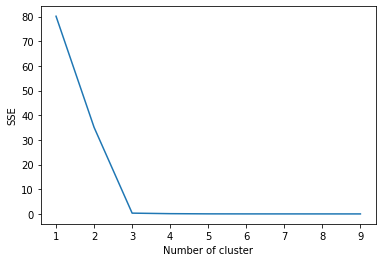

In [178]:
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [179]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_principal)

KMeans(n_clusters=3)

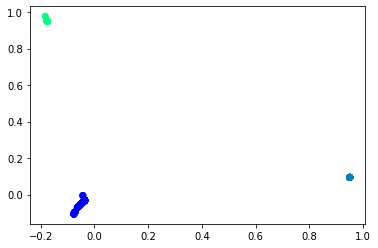

In [180]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

In [181]:
_a = pd.DataFrame(X_principal)

In [182]:
df['kmean_artist_1'] = X_principal['P1']
df['kmean_artist_2'] = X_principal['P2']

In [183]:
df = df.drop('Artists',axis=1)

**Album**

In [184]:
df

,Id,Category,Duration,Album,BPM,Energy,Dancebility,Happiness,Fem_voc,Mal_voc,...,Album_type_Other,Album_type_compilation,Album_type_single,GB,USA,RUS,other_country,Other_Artists,kmean_artist_1,kmean_artist_2
0,0,dislike,253660,Hail the Apocalypse,93,99.0,42.0,30.0,0.0,1.0,...,1,0,0,0.0,0.0,0.0,1.0,1.0,-0.035895,-0.032892
1,1,like,284150,My Love Ultimate Essential Collection,99,28.0,43.0,4.0,1.0,0.0,...,1,0,0,0.0,0.0,0.0,1.0,1.0,-0.035895,-0.032892
2,2,like,286480,Skyfall,76,55.0,35.0,8.0,1.0,0.0,...,0,0,1,1.0,0.0,0.0,0.0,1.0,-0.035895,-0.032892
3,3,like,268440,KISS Box Set,128,85.0,77.0,87.0,0.0,1.0,...,1,0,0,0.0,1.0,0.0,0.0,1.0,-0.035895,-0.032892
4,4,dislike,311420,Graduation,104,72.0,62.0,49.0,0.0,1.0,...,1,0,0,0.0,1.0,0.0,0.0,1.0,-0.035895,-0.032892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,960,none,161530,Кабриолет,132,82.0,75.0,80.0,0.0,1.0,...,0,0,1,0.0,0.0,1.0,0.0,0.0,-0.042460,-0.041185
961,961,none,183640,G-Sides,172,82.0,75.0,61.0,0.0,1.0,...,1,0,0,1.0,0.0,0.0,0.0,0.0,-0.175743,0.949058
962,962,none,186520,Planet Of The Apes - Best Of Guano Apes,112,96.0,63.0,43.0,1.0,0.0,...,1,0,0,0.0,1.0,0.0,0.0,1.0,-0.035895,-0.032892
963,963,none,247620,Memories...Do Not Open,130,63.0,62.0,45.0,0.0,1.0,...,1,0,0,1.0,0.0,0.0,0.0,1.0,-0.076360,-0.105826


In [185]:
df["Album"] = df["Album"].fillna("NA")
all_albums = []
for i in df.index:
    all_albums.extend(df.loc[i, "Album"].split("|"))
len(set(all_albums))

700

In [186]:
other = Counter(all_albums)

In [187]:
threshold = 3
others = Counter(all_albums)
others = [k for k in others if others[k]<=threshold]
len(others)
a_others = Counter(others)

In [188]:
in_train, in_test = [], []
for i in df.loc[tr_mask].index:
    in_train.extend(df.loc[i, "Album"].split("|"))
for i in df.loc[~tr_mask].index:
    in_test.extend(df.loc[i, "Album"].split("|"))
    
only_test = set(in_test) - set(in_train)
only_train = set(in_train) - set(in_test)
display(len(only_test))
display(len(only_train))

189

447

In [189]:
all_albums = list(set(all_albums) - set(others) - only_test - only_train)
print(len(all_albums))
others = set(others) | only_test | only_train
print(len(others))

30
670


In [190]:
res = []
def prune(x):
    vector = np.zeros(len(all_albums)+1) #for others
    x = [i for i in x.split("|")]
    for i in range(len(all_albums)):
        vector[i]=1 if all_albums[i] in x else 0
    if len(x)>sum(vector):
        vector[-1]=1
    res.append(vector)

df["Album"].apply(prune)
onehot_albums= pd.DataFrame(res, columns = all_albums+["Others"], index=df.index)

In [191]:
df["Other_Albums"] = onehot_albums["Others"]
onehot_albums = onehot_albums.drop("Others", axis=1)
onehot_albums["Category"] = df["Category"]

In [192]:
onehot_albums

,Lest We Forget: The Best Of,Звучит,The Now Now,Love It ритм,Legend,Great Depression,Hollywood's Bleeding,The 20/20 Experience,OK Computer OKNOTOK 1997 2017,Greatest Hitz,...,The Studio Album Collection 1991-2011,The Discovery Boxset,Blurryface,"Song Machine, Season One: Strange Timez",Trench,Vessel,The Singles Collection,Humanz,The Singles Collection 2001-2011,Category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dislike
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,like
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,like
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,like
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dislike
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none
961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none
962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none
963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,none


In [193]:
__df = onehot_albums.drop('Category',axis=1)

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(__df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head()

,P1,P2
0,-0.010815,-0.013846
1,-0.010815,-0.013846
2,-0.010815,-0.013846
3,-0.010815,-0.013846
4,-0.010815,-0.013846


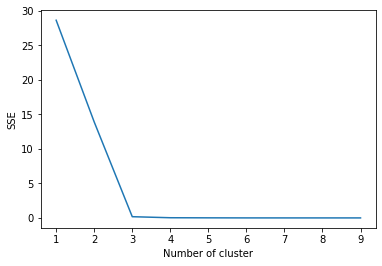

In [194]:
import matplotlib.pyplot as plt

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [195]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_principal)

KMeans(n_clusters=3)

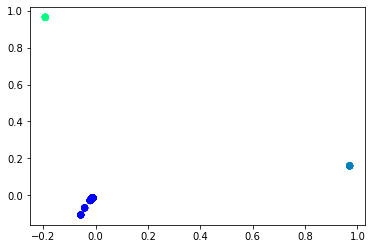

In [196]:
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

In [197]:
_a = pd.DataFrame(X_principal)

In [198]:
df['kmean_album_1'] = X_principal['P1']
df['kmean_album_2'] = X_principal['P2']

In [199]:
df.head()

,Id,Category,Duration,Album,BPM,Energy,Dancebility,Happiness,Fem_voc,Mal_voc,...,GB,USA,RUS,other_country,Other_Artists,kmean_artist_1,kmean_artist_2,Other_Albums,kmean_album_1,kmean_album_2
0,0,dislike,253660,Hail the Apocalypse,93,99.0,42.0,30.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,-0.035895,-0.032892,1.0,-0.010815,-0.013846
1,1,like,284150,My Love Ultimate Essential Collection,99,28.0,43.0,4.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,-0.035895,-0.032892,1.0,-0.010815,-0.013846
2,2,like,286480,Skyfall,76,55.0,35.0,8.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,-0.035895,-0.032892,1.0,-0.010815,-0.013846
3,3,like,268440,KISS Box Set,128,85.0,77.0,87.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,-0.035895,-0.032892,1.0,-0.010815,-0.013846
4,4,dislike,311420,Graduation,104,72.0,62.0,49.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,-0.035895,-0.032892,1.0,-0.010815,-0.013846


In [200]:
df = df.drop('Album',axis=1)

In [201]:
df

,Id,Category,Duration,BPM,Energy,Dancebility,Happiness,Fem_voc,Mal_voc,Release_decade,...,GB,USA,RUS,other_country,Other_Artists,kmean_artist_1,kmean_artist_2,Other_Albums,kmean_album_1,kmean_album_2
0,0,dislike,253660,93,99.0,42.0,30.0,0.0,1.0,2010,...,0.0,0.0,0.0,1.0,1.0,-0.035895,-0.032892,1.0,-0.010815,-0.013846
1,1,like,284150,99,28.0,43.0,4.0,1.0,0.0,2010,...,0.0,0.0,0.0,1.0,1.0,-0.035895,-0.032892,1.0,-0.010815,-0.013846
2,2,like,286480,76,55.0,35.0,8.0,1.0,0.0,2010,...,1.0,0.0,0.0,0.0,1.0,-0.035895,-0.032892,1.0,-0.010815,-0.013846
3,3,like,268440,128,85.0,77.0,87.0,0.0,1.0,2000,...,0.0,1.0,0.0,0.0,1.0,-0.035895,-0.032892,1.0,-0.010815,-0.013846
4,4,dislike,311420,104,72.0,62.0,49.0,0.0,1.0,2000,...,0.0,1.0,0.0,0.0,1.0,-0.035895,-0.032892,1.0,-0.010815,-0.013846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,960,none,161530,132,82.0,75.0,80.0,0.0,1.0,2010,...,0.0,0.0,1.0,0.0,0.0,-0.042460,-0.041185,1.0,-0.010815,-0.013846
961,961,none,183640,172,82.0,75.0,61.0,0.0,1.0,2000,...,1.0,0.0,0.0,0.0,0.0,-0.175743,0.949058,1.0,-0.010815,-0.013846
962,962,none,186520,112,96.0,63.0,43.0,1.0,0.0,2010,...,0.0,1.0,0.0,0.0,1.0,-0.035895,-0.032892,1.0,-0.010815,-0.013846
963,963,none,247620,130,63.0,62.0,45.0,0.0,1.0,2010,...,1.0,0.0,0.0,0.0,1.0,-0.076360,-0.105826,1.0,-0.010815,-0.013846


**Model**

In [202]:
x, y = df.loc[tr_mask].iloc[:,2:], df.loc[tr_mask,"Category"]
deploy = df.loc[~tr_mask].iloc[:,2:]

In [203]:
def zero_one(a_string):
    if a_string == 'like':
        return 1
    else:
        return 0
y = y.map(zero_one)

In [204]:
from sklearn import preprocessing

In [205]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(x)

In [206]:
from sklearn.model_selection import train_test_split

In [207]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

In [208]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5) 

In [209]:
from keras.models import Sequential
from keras.layers import Dense

In [210]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(47,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

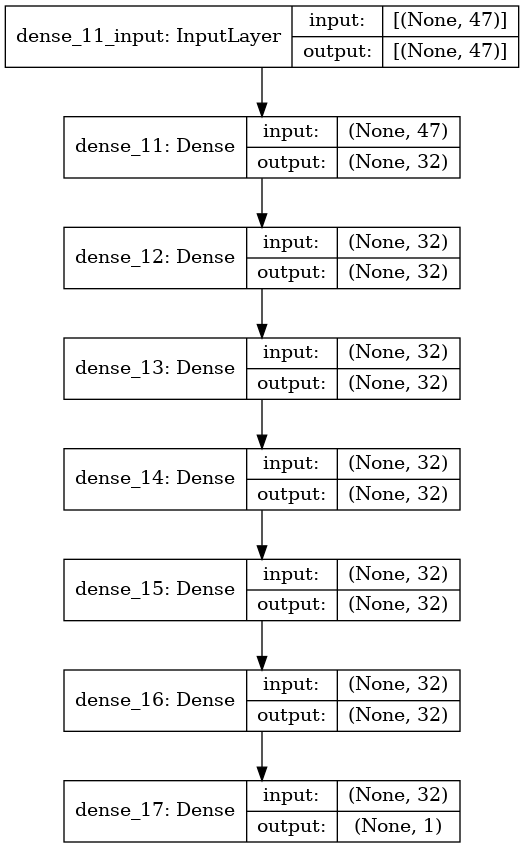

In [211]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [212]:
model.compile(optimizer='sgd',  #sgd’ refers to stochastic gradient descent (over here, it refers to mini-batch gradient descent),
              loss='binary_crossentropy', #The loss function for outputs that take the values 1 or 0 is called binary cross entropy.
              metrics=['accuracy'])  #we want to track accuracy on top of the loss function.

In [213]:
result = model.fit(X_train, Y_train,
          batch_size=47, epochs=200, # these parameters can significantly change your accuracy.
          validation_data=(X_val, Y_val))

Epoch 1/200
10/10 [==============================] - 1s 33ms/step - loss: nan - accuracy: 0.5155 - val_loss: nan - val_accuracy: 0.5800
Epoch 2/200
10/10 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.4455 - val_loss: nan - val_accuracy: 0.5800
Epoch 3/200
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.4484 - val_loss: nan - val_accuracy: 0.5800
Epoch 4/200
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.4381 - val_loss: nan - val_accuracy: 0.5800
Epoch 5/200
10/10 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.4066 - val_loss: nan - val_accuracy: 0.5800
Epoch 6/200
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3944 - val_loss: nan - val_accuracy: 0.5800
Epoch 7/200
10/10 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.4485 - val_loss: nan - val_accuracy: 0.5800
Epoch 8/200
10/10 [==============================] - 0

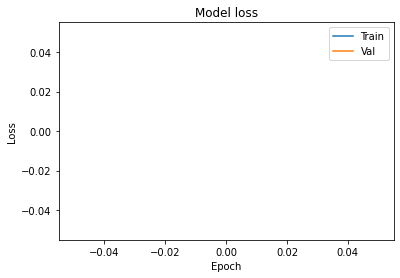

In [214]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [215]:
from keras.layers import Dropout
from keras import regularizers

In [216]:
model_3 = Sequential([
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(47,)), # lambda sign
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)),
])

In [ ]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
          batch_size=5, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
93/93 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.4180 - val_loss: nan - val_accuracy: 0.5800
Epoch 2/100
93/93 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4318 - val_loss: nan - val_accuracy: 0.5800
Epoch 3/100
93/93 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4622 - val_loss: nan - val_accuracy: 0.5800
Epoch 4/100
93/93 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4402 - val_loss: nan - val_accuracy: 0.5800
Epoch 5/100
93/93 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4442 - val_loss: nan - val_accuracy: 0.5800
Epoch 6/100
93/93 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4254 - val_loss: nan - val_accuracy: 0.5800
Epoch 7/100
93/93 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.4514 - val_loss: nan - val_accuracy: 0.5800
Epoch 8/100
93/93 [==============================] - 0s

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
errors = abs(np.array(hist_3.history['loss']) - np.array(hist_3.history['val_loss']))
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

In [ ]:
# mean absolute percentage error (MAPE)
mape = 100 * (errors / np.array(hist_3.history['loss']))
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
import xgboost as xgb

deploy_scale = np.array(min_max_scaler.fit_transform(deploy))

train = xgb.DMatrix(X_train, label=Y_train)
test = xgb.DMatrix(X_test, label=Y_test)


In [ ]:
param = {
    'max_depth': 4,
    'eta': 0.03,
    'objective': 'multi:softmax',
    'num_class': 3} 
epochs = 10

In [ ]:
model_5 = xgb.train(param, train, epochs)

In [ ]:
predictions = model_5.predict(test)

In [ ]:
print(predictions)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, predictions)

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, Y_train, verbose=False)

In [ ]:
predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, Y_test)))

In [ ]:
my_model = XGBRegressor(n_estimators=1000)
my_model.fit(X_train, Y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, Y_test)], verbose=False)

In [ ]:
print(predictions)

In [ ]:
predictions_y = [round(value) for value in predictions]
print(predictions_y)

**Test**

In [ ]:
deploy

In [ ]:
sample = pd.read_csv(f"{PATH}sample_submition.csv")

sample["Category"] = my_model.predict(deploy_scale).round().astype(int)

In [ ]:
sample.to_csv("deploy.csv", index=False)